# Demo kernel PCA

Adapted by <alberto.suarez@uam.es>  from

[Kernel PCA (sklearn)](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)   
Authors: Mathieu Blondel, Andreas Mueller
          
License: [BSD 3 clause](https://opensource.org/licenses/BSD-3-Clause)	
 


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from sklearn.decomposition import PCA, KernelPCA
from sklearn import datasets

import kernel_machine_learning as kpca

In [2]:
# Input data

np.random.seed(0) # for reproductible results
# X, y = datasets.make_circles(n_samples=400, factor=.3, noise=.05)
X, y = datasets.make_moons(n_samples=400, noise=.05)


In [3]:
# Principal componets

# PCA (linear)
X_pca, eigenvals_pca, eigenvecs_pca = \
    kpca.kernel_pca(X, X, kpca.linear_kernel)

# Kernel PCA
A = 1.0
gamma = 20.0
L = np.sqrt(0.5/gamma)

def rbf_kernel(X, X_prime):
    return kpca.rbf_kernel(X, X_prime, A, L)


X_kpca, eigenvals_kpca, eigenvecs_kpca = \
    kpca.kernel_pca(X, X, rbf_kernel)

# PCA (sklearn)
pca = PCA()
X_pca_sk = pca.fit_transform(X)

# Kernel PCA (sklearn)
kernel_pca = KernelPCA(kernel='rbf',
                       fit_inverse_transform=True,
                       gamma=gamma)
X_kpca_sk = kernel_pca.fit_transform(X)
X_back = kernel_pca.inverse_transform(X_kpca_sk)

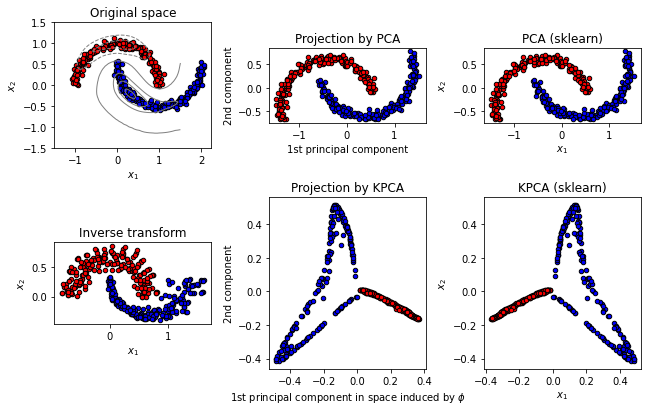

In [4]:
# Plot results

plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1, aspect='equal')
plt.title('Original space')
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c='red',
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c='blue',
            s=20, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi space)
Z_grid = kernel_pca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')


plt.subplot(2, 3, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


plt.subplot(2, 3, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 3, 5, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 3, 3, aspect='equal')
plt.scatter(X_pca_sk[reds, 0], X_pca_sk[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca_sk[blues, 0], X_pca_sk[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA (sklearn)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


plt.subplot(2, 3, 6, aspect='equal')
plt.scatter(X_kpca_sk[reds, 0], X_kpca_sk[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca_sk[blues, 0], X_kpca_sk[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("KPCA (sklearn)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

## Questions

1. **Why do the projections onto the first two KPCA principal components look different for the sklearn and our implementation? Is any of the two incorrect?**

They are both perfectly correct, the difference lies on the sign of the PC directions. In Sklearn, the function [`svd_flip()`](https://github.com/scikit-learn/scikit-learn/blob/15c2c72e27c6ea18566f4e786506c7a3aef8a5de/sklearn/utils/extmath.py#L504%7D%7Breference) finds a deterministic way to assigns the signs of these eigenvectors. We added an optional parameter to our `kernel_pca()` function that uses this deterministic assignation, mainly for the animation created in the next question.

2. **Make an animation that shows the evolution of the projections onto the first two KPCA components with $ 0.002 < \gamma < 20000.0$**.

In [11]:
animatior = kpca.AnimationKPCA(n_frames=100)
animation = animatior.animate(X, X, y)
plt.close()

HTML(animation.to_jshtml())

3. **Vary the parameters of the kernel and comment on the behavior of the projections onto the first two KPCA components for the different values considered (e.g. $\gamma \in \left\{0.02, 0.2, 2.0, 20.0, 200.0, 2000.0\right\}$). In particular,**
    1. **What is the behaviour in the limit in which the width of the kernel approaches $\infty$. Explain why one should expect such behavior.**
    2. **What is the behaviour in the limit in which the width of the kernel approaches $0$. Explain why one should expect such behavior.**


In the animation above we can see the evolution step by step (in logarithmic scale) when changing the $\gamma$ value. Let us study the behaviour in the limits. We know the kernel expression is parameterized with $\gamma$ using the following expression:

$$
    \mathcal{K}(x, x') = \text{exp}( -\gamma \parallel x - x' \parallel^2 )
$$

When $\gamma$ increases, the kernel becomes thinner and thinner due the negative sign (effectively becoming a *delta* function). When we evaluate the kernel in the training dataset, the identity matrix is obtained:

$$
    \lim_{\gamma \rightarrow \infty} \mathcal{K}(x, x') = \delta(x - x') \\
    K \equiv \mathcal{K}(X, X) = I
$$

Let us compute the centered kernel matrix using this result:

\begin{align*}
    \tilde K & = K - \frac{1}{N} K \mathbb{1} - \frac{1}{N} \mathbb{1} K + \frac{1}{N^2} \mathbb{1} K \mathbb{1} \\
    & = \text{I} - \frac{1}{N} \text{I} \mathbb{1} - \frac{1}{N} \mathbb{1} \text{I} + \frac{1}{N^2} \mathbb{1} \text{I} \mathbb{1} \\
    & = \text{I} - \frac{2}{N} \mathbb{1} \text{I} + \frac{1}{N^2} \mathbb{1}^2 \\
    & = \text{I} - \frac{2}{N} \mathbb{1} \text{I} + \frac{N}{N^2} \mathbb{1} \\
    & = \text{I} - \frac{1}{N} \mathbb{1} \\
\end{align*}

Where $\mathbb{1}$ is a $N\times N$ matrix full of ones. When $N$ is large enough, this perturbation on the identity matrix is almost imperceptible for our purposes.

The eigenvalues of this matrix are obviously all ones and our orthonormal basis will be the usual one. The projection of the data to the PC's space is quite interesting:

$$
    \tilde K \ (\alpha_1 \ \alpha_2 \cdots \ \alpha_N) = \text I \ \text I = \text I
$$

When representing the projections to the first two components we will project the first point in our dataset to $(1,0)$ and the second one to $(0,1)$, while the rest are projected to the origin. The perturbations added by the substraction of $\frac{1}{N} \mathbb{1}$ affect the points mapped to the origin, as it can be seen in the following graph.

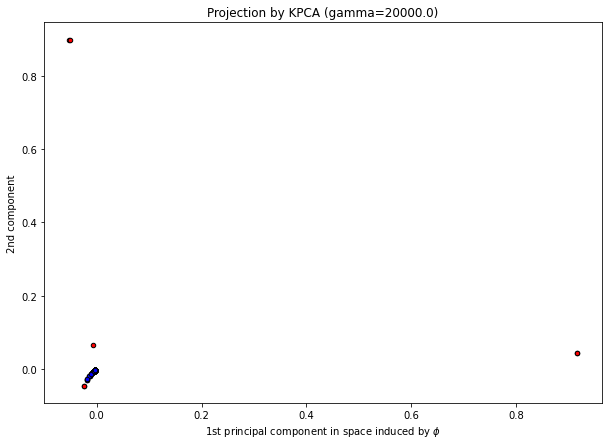

In [8]:
gamma = 2e4
kpca.plot_KPCA(gamma, X, y)

In the opposite case, when $\gamma$ decreases and it gets closer to $0$, the kernel becomes wider and flatter. That is, the exponent comes closer to $0$ independently of the values of $x$ and $x'$. When $\gamma$ is small enough we may assume the exponential always takes the value $1$:

$$
    \lim_{\gamma \rightarrow 0} \mathcal{K}(x, x') = 1 \\
$$

Thus, the evaluation of the kernel function on the data becomes a matriz full of ones:

$$
    K \equiv \mathcal{K}(X, X) = \mathbb 1
$$

Let us compute the expression of the centered kernel matrix:

\begin{align*}
    \tilde K & = K - \frac{1}{N} K \mathbb{1} - \frac{1}{N} \mathbb{1} K + \frac{1}{N^2} \mathbb{1} K \mathbb{1} \\
    & = \mathbb 1 - \frac{2}{N} \mathbb 1^2 + \frac{1}{N^2} \mathbb 1^3 \\
    & = \mathbb 1 - 2 \ \mathbb 1 + \mathbb 1 \\
    & = 0,
\end{align*}

Where, to obtain the third equality, we have used that $\mathbb{1}^2 = N \mathbb{1}$. In practice, $\gamma$ never really reaches $0$, so the $\tilde K$ matrix can be expressed as really close to $0$:

$$
    \tilde K = \epsilon \mathbb 1
$$

Where $\epsilon > 0 $ and arbitrarily small. Given a orthornomal basis of eigevectors of $\tilde K$, $\{\alpha_1, \ldots, \alpha_N\}$, let us compute the projection to the PC's space:

$$
   \tilde K \ (\alpha_1 \ \alpha_2 \cdots \ \alpha_N) = \epsilon \mathbb 1 (\alpha_1 \ \alpha_2 \cdots \ \alpha_N)
$$

Which only depends on the $\epsilon$ value. That is, the overall structure of the points is preserved but multiplied by an $\epsilon$ scaling factor, making the structure smaller. We can appreciate this behaviour in the following graphs, where the second one fixes the axis limits to $(0.5, 0.5)$ so the scale can be appreciated.

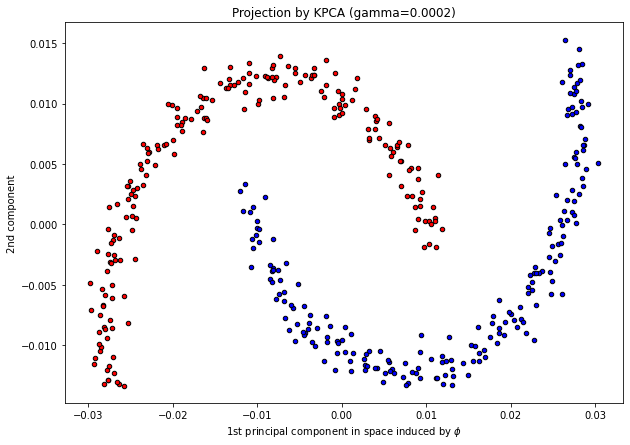

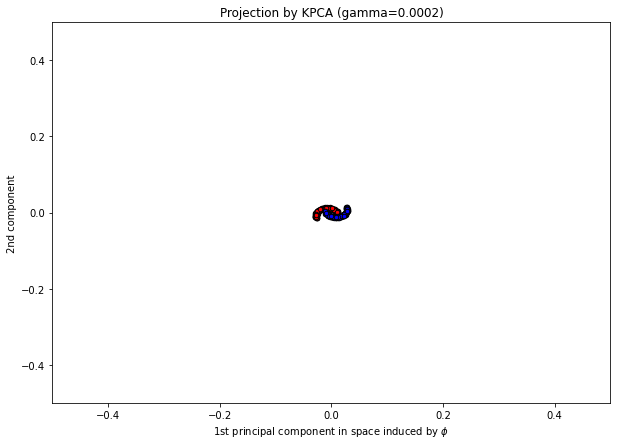

In [9]:
gamma = 2e-4
kpca.plot_KPCA(gamma, X, y)
kpca.plot_KPCA(gamma, X, y, lims=(-0.5, 0.5))